<a href="https://colab.research.google.com/github/y-patankar/StockMarket/blob/main/COSTCO_next_day(with_patterns).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import BDay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import pandas as pd

In [ ]:
df = pd.read_csv('COST_Shuffled(2 days).csv')

In [ ]:
df.set_index('Date', drop=False, inplace=True)
df

,Unnamed: 0,Date,Open,High,Low,Close,date-1,open-1,high-1,low-1,close-1,date-2,open-2,high-2,low-2,close-2,close-7day,close-14day
Date,,,,,,,,,,,,,,,,,,
2004-05-20,0,2004-05-20,36.520000,36.730000,36.310001,36.689999,2004-05-19,36.799999,37.049999,36.450001,36.520000,2004-05-18,35.869999,36.959999,35.770000,36.389999,36.119999,37.500000
2023-02-01,1,2023-02-01,508.309998,520.450012,504.720001,517.909973,2023-01-31,503.230011,511.410004,502.000000,511.140015,2023-01-30,500.369995,505.600006,500.369995,503.279999,492.609985,484.309998
2003-01-29,2,2003-01-29,29.040001,29.400000,28.360001,29.320000,2003-01-28,28.900000,29.330000,28.850000,29.209999,2003-01-27,28.680000,29.559999,28.559999,28.770000,30.070000,29.299999
2004-09-28,3,2004-09-28,41.470001,41.549999,41.139999,41.299999,2004-09-27,41.169998,41.660000,41.110001,41.200001,2004-09-24,40.700001,41.680000,40.580002,41.349998,41.259998,40.119999
2008-08-28,4,2008-08-28,66.860001,67.930000,66.839996,67.809998,2008-08-27,66.349998,67.169998,65.870003,66.709999,2008-08-26,66.419998,66.730003,65.599998,66.519997,66.459999,66.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-18,5659,2008-03-18,61.220001,61.750000,60.009998,61.669998,2008-03-17,60.400002,60.889999,59.660000,60.360001,2008-03-14,62.580002,62.849998,60.090000,60.860001,60.299999,64.489998
2009-03-10,5660,2009-03-10,39.029999,40.189999,38.650002,40.139999,2009-03-09,38.439999,39.470001,38.180000,38.439999,2009-03-06,39.580002,39.740002,38.169998,38.980000,42.340000,42.380001
2023-02-14,5661,2023-02-14,505.010010,507.850006,498.630005,503.220001,2023-02-13,501.739990,506.790009,501.350006,506.450012,2023-02-10,498.510010,500.549988,495.380005,499.989990,514.799988,490.880005


In [ ]:
df = df[['Open','Close','open-1', 'high-1','low-1','close-1','close-7day','close-14day']]
df

,Open,Close,open-1,high-1,low-1,close-1,close-7day,close-14day
Date,,,,,,,,
2004-05-20,36.520000,36.689999,36.799999,37.049999,36.450001,36.520000,36.119999,37.500000
2023-02-01,508.309998,517.909973,503.230011,511.410004,502.000000,511.140015,492.609985,484.309998
2003-01-29,29.040001,29.320000,28.900000,29.330000,28.850000,29.209999,30.070000,29.299999
2004-09-28,41.470001,41.299999,41.169998,41.660000,41.110001,41.200001,41.259998,40.119999
2008-08-28,66.860001,67.809998,66.349998,67.169998,65.870003,66.709999,66.459999,66.989998
...,...,...,...,...,...,...,...,...
2008-03-18,61.220001,61.669998,60.400002,60.889999,59.660000,60.360001,60.299999,64.489998
2009-03-10,39.029999,40.139999,38.439999,39.470001,38.180000,38.439999,42.340000,42.380001
2023-02-14,505.010010,503.220001,501.739990,506.790009,501.350006,506.450012,514.799988,490.880005


In [ ]:
columns_to_exclude = ['Open', 'Close','close-7day','close-14day']

# Select only the columns to include in calculations
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Calculate the minimum and maximum values for the selected columns
df['Row_Min'] = df[columns_to_include].min(axis=1)
df['Row_Max'] = df[columns_to_include].max(axis=1)

# Display the updated DataFrame
df

<ipython-input-82-c6595d10135b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Row_Min'] = df[columns_to_include].min(axis=1)
<ipython-input-82-c6595d10135b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Row_Max'] = df[columns_to_include].max(axis=1)


,Open,Close,open-1,high-1,low-1,close-1,close-7day,close-14day,Row_Min,Row_Max
Date,,,,,,,,,,
2004-05-20,36.520000,36.689999,36.799999,37.049999,36.450001,36.520000,36.119999,37.500000,36.450001,37.049999
2023-02-01,508.309998,517.909973,503.230011,511.410004,502.000000,511.140015,492.609985,484.309998,502.000000,511.410004
2003-01-29,29.040001,29.320000,28.900000,29.330000,28.850000,29.209999,30.070000,29.299999,28.850000,29.330000
2004-09-28,41.470001,41.299999,41.169998,41.660000,41.110001,41.200001,41.259998,40.119999,41.110001,41.660000
2008-08-28,66.860001,67.809998,66.349998,67.169998,65.870003,66.709999,66.459999,66.989998,65.870003,67.169998
...,...,...,...,...,...,...,...,...,...,...
2008-03-18,61.220001,61.669998,60.400002,60.889999,59.660000,60.360001,60.299999,64.489998,59.660000,60.889999
2009-03-10,39.029999,40.139999,38.439999,39.470001,38.180000,38.439999,42.340000,42.380001,38.180000,39.470001
2023-02-14,505.010010,503.220001,501.739990,506.790009,501.350006,506.450012,514.799988,490.880005,501.350006,506.790009


In [ ]:
def detect_patterns(df):
    # Initialize the 'Pattern' column with None values
    df['Pattern'] = None

    patterns = [
    # Hammer
    ('1', ((df['close-1'] > df['open-1']) &
           ((df['high-1'] - df['close-1']) <= (df['close-1'] - df['open-1']) * 0.2) &
           ((df['open-1'] - df['low-1']) >= (df['close-1'] - df['open-1']) * 2) &
           ((df['high-1'] - df['low-1']) > (df['close-1'] - df['open-1']) * 2))),

    # Inverted Hammer
    ('2', ((df['close-1'] < df['open-1']) &
            ((df['high-1'] - df['open-1']) <= (df['open-1'] - df['close-1']) * 0.2) &
            ((df['close-1'] - df['low-1']) >= (df['open-1'] - df['close-1']) * 2) &
            ((df['high-1'] - df['low-1']) > (df['open-1'] - df['close-1']) * 2))),

    # Shooting Star
    ('3', ((df['close-1'] < df['open-1']) &
            ((df['high-1'] - df['open-1']) >= (df['open-1'] - df['close-1']) * 2) &
            ((df['low-1'] - df['close-1']) <= (df['open-1'] - df['close-1']) * 0.2) &
            ((df['high-1'] - df['low-1']) > (df['open-1'] - df['close-1']) * 2))),

    # Hanging Man
    ('4', ((df['close-1'] > df['open-1']) &
            ((df['high-1'] - df['close-1']) <= (df['close-1'] - df['open-1']) * 0.2) &
            ((df['open-1'] - df['low-1']) >= (df['close-1'] - df['open-1']) * 2) &
            ((df['high-1'] - df['low-1']) > (df['close-1'] - df['open-1']) * 2))),

    # Doji
    ('5', ((df['close-1'] == df['open-1']) &
           ((df['high-1'] - df['low-1']) <= df['close-1'] * 0.1))),

    # Dragonfly Doji
    ('6', ((df['close-1'] == df['open-1']) &
            (df['close-1'] == df['high-1']) &
            (df['open-1'] != df['low-1']))),

    # Gravestone Doji
    ('7', ((df['close-1'] == df['open-1']) &
            (df['close-1'] == df['low-1']) &
            (df['open-1'] != df['high-1']))),

    # Bearish Marubozu
    ('10', ((df['close-1'] == df['low-1']) & (df['open-1'] == df['high-1']))),

    # Bullish Marubozu
    ('9', ((df['close-1'] == df['high-1']) & (df['open-1'] == df['low-1']))),

    # Spinning Top
    ('8', (((df['high-1'] - df['low-1']) > (df['close-1'] - df['open-1']) * 2) &
            ((df['high-1'] - df['close-1']) >= (df['close-1'] - df['open-1']) * 0.5) &
            ((df['open-1'] - df['low-1']) >= (df['close-1'] - df['open-1']) * 0.5) &
            ((df['close-1'] != df['open-1']) |
             ((df['high-1'] - df['low-1']) > (df['close-1'] * 0.1)))))
]

    for pattern_abbr, condition in patterns:
        # Assign the pattern abbreviation to rows matching the condition
        df.loc[condition, 'Pattern'] = pattern_abbr

    return df

# Apply the modified function to the DataFrame
df = detect_patterns(df)
df

<ipython-input-83-c46a7e225f91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pattern'] = None


,Open,Close,open-1,high-1,low-1,close-1,close-7day,close-14day,Row_Min,Row_Max,Pattern
Date,,,,,,,,,,,
2004-05-20,36.520000,36.689999,36.799999,37.049999,36.450001,36.520000,36.119999,37.500000,36.450001,37.049999,8
2023-02-01,508.309998,517.909973,503.230011,511.410004,502.000000,511.140015,492.609985,484.309998,502.000000,511.410004,None
2003-01-29,29.040001,29.320000,28.900000,29.330000,28.850000,29.209999,30.070000,29.299999,28.850000,29.330000,None
2004-09-28,41.470001,41.299999,41.169998,41.660000,41.110001,41.200001,41.259998,40.119999,41.110001,41.660000,8
2008-08-28,66.860001,67.809998,66.349998,67.169998,65.870003,66.709999,66.459999,66.989998,65.870003,67.169998,8
...,...,...,...,...,...,...,...,...,...,...,...
2008-03-18,61.220001,61.669998,60.400002,60.889999,59.660000,60.360001,60.299999,64.489998,59.660000,60.889999,8
2009-03-10,39.029999,40.139999,38.439999,39.470001,38.180000,38.439999,42.340000,42.380001,38.180000,39.470001,5
2023-02-14,505.010010,503.220001,501.739990,506.790009,501.350006,506.450012,514.799988,490.880005,501.350006,506.790009,None


In [ ]:
def detect_patterns(df):
    # Initialize the 'Pattern' column with None values
    df['Pattern'] = None

    # Define a list of tuples, each containing a condition and its corresponding pattern abbreviation
    patterns = [
    ('1', ((df['close-1'] > df['open-1']) &
           ((df['high-1'] - df['close-1']) <= (df['close-1'] - df['open-1']) * 2) &
           ((df['open-1'] - df['low-1']) >= (df['close-1'] - df['open-1']) * 2) &
           ((df['high-1'] - df['low-1']) > 2 * (df['close-1'] - df['open-1'])))),

    ('2', ((df['close-1'] < df['open-1']) &
            ((df['high-1'] - df['open-1']) <= (df['open-1'] - df['close-1']) * 2) &
            ((df['close-1'] - df['low-1']) >= (df['open-1'] - df['close-1']) * 2) &
            ((df['high-1'] - df['low-1']) > 2 * (df['open-1'] - df['close-1'])))),

    ('3', ((df['close-1'] < df['open-1']) &
            ((df['high-1'] - df['open-1']) >= (df['open-1'] - df['close-1']) * 2) &
            ((df['low-1'] - df['close-1']) <= (df['open-1'] - df['close-1']) * 2) &
            ((df['high-1'] - df['low-1']) > 2 * (df['open-1'] - df['close-1'])))),

    ('4', ((df['close-1'] > df['open-1']) &
            ((df['high-1'] - df['close-1']) <= (df['close-1'] - df['open-1']) * 2) &
            ((df['open-1'] - df['low-1']) >= (df['close-1'] - df['open-1']) * 2) &
            ((df['high-1'] - df['low-1']) > 2 * (df['close-1'] - df['open-1'])))),

    ('5', ((df['close-1'] == df['open-1']) &
           ((df['high-1'] - df['low-1']) <= df['close-1'] * 0.1))),

    ('6', ((df['close-1'] == df['open-1']) &
            (df['close-1'] == df['high-1']) &
            (df['open-1'] != df['low-1']))),

    ('7', ((df['close-1'] == df['open-1']) &
            (df['close-1'] == df['low-1']) &
            (df['open-1'] != df['high-1']))),

    ('10', ((df['close-1'] == df['low-1']) & (df['open-1'] == df['high-1']))),

    ('9', ((df['close-1'] == df['high-1']) & (df['open-1'] == df['low-1']))),

    ('8', (((df['high-1'] - df['low-1']) > (df['close-1'] - df['open-1']) * 2) &
            ((df['high-1'] - df['close-1']) >= (df['close-1'] - df['open-1'])) &
            ((df['open-1'] - df['low-1']) >= (df['close-1'] - df['open-1'])) &
            ((df['close-1'] != df['open-1']) |
             ((df['high-1'] - df['low-1']) > (df['close-1'] * 0.1)))))
]

    # Iterate over each pattern condition and abbreviation
    for pattern_abbr, condition in patterns:
        # Assign the pattern abbreviation to rows matching the condition
        df.loc[condition, 'Pattern'] = pattern_abbr

    return df

# Apply the modified function to the DataFrame
df = detect_patterns(df)
df


<ipython-input-84-acfdc0d9427d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pattern'] = None


,Open,Close,open-1,high-1,low-1,close-1,close-7day,close-14day,Row_Min,Row_Max,Pattern
Date,,,,,,,,,,,
2004-05-20,36.520000,36.689999,36.799999,37.049999,36.450001,36.520000,36.119999,37.500000,36.450001,37.049999,8
2023-02-01,508.309998,517.909973,503.230011,511.410004,502.000000,511.140015,492.609985,484.309998,502.000000,511.410004,None
2003-01-29,29.040001,29.320000,28.900000,29.330000,28.850000,29.209999,30.070000,29.299999,28.850000,29.330000,None
2004-09-28,41.470001,41.299999,41.169998,41.660000,41.110001,41.200001,41.259998,40.119999,41.110001,41.660000,8
2008-08-28,66.860001,67.809998,66.349998,67.169998,65.870003,66.709999,66.459999,66.989998,65.870003,67.169998,8
...,...,...,...,...,...,...,...,...,...,...,...
2008-03-18,61.220001,61.669998,60.400002,60.889999,59.660000,60.360001,60.299999,64.489998,59.660000,60.889999,8
2009-03-10,39.029999,40.139999,38.439999,39.470001,38.180000,38.439999,42.340000,42.380001,38.180000,39.470001,5
2023-02-14,505.010010,503.220001,501.739990,506.790009,501.350006,506.450012,514.799988,490.880005,501.350006,506.790009,None


In [ ]:
X = df.drop(columns=['Close','Open','close-7day','close-14day'])#'H',	'IH',	'SS',	'HM',	'D',	'DD',	'GD',	'ST',	'BL_M',	'BR_M'])
y = df['Close']


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert to MSE since cross_val_score returns negative values for MSE
print(f"Cross-validated Mean Squared Error: {mse_scores.mean():.4f} (+/- {mse_scores.std():.4f})")


Cross-validated Mean Squared Error: 28.0069 (+/- 7.7368)


In [ ]:
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse:.4f}")


Test Mean Squared Error: 21.7497


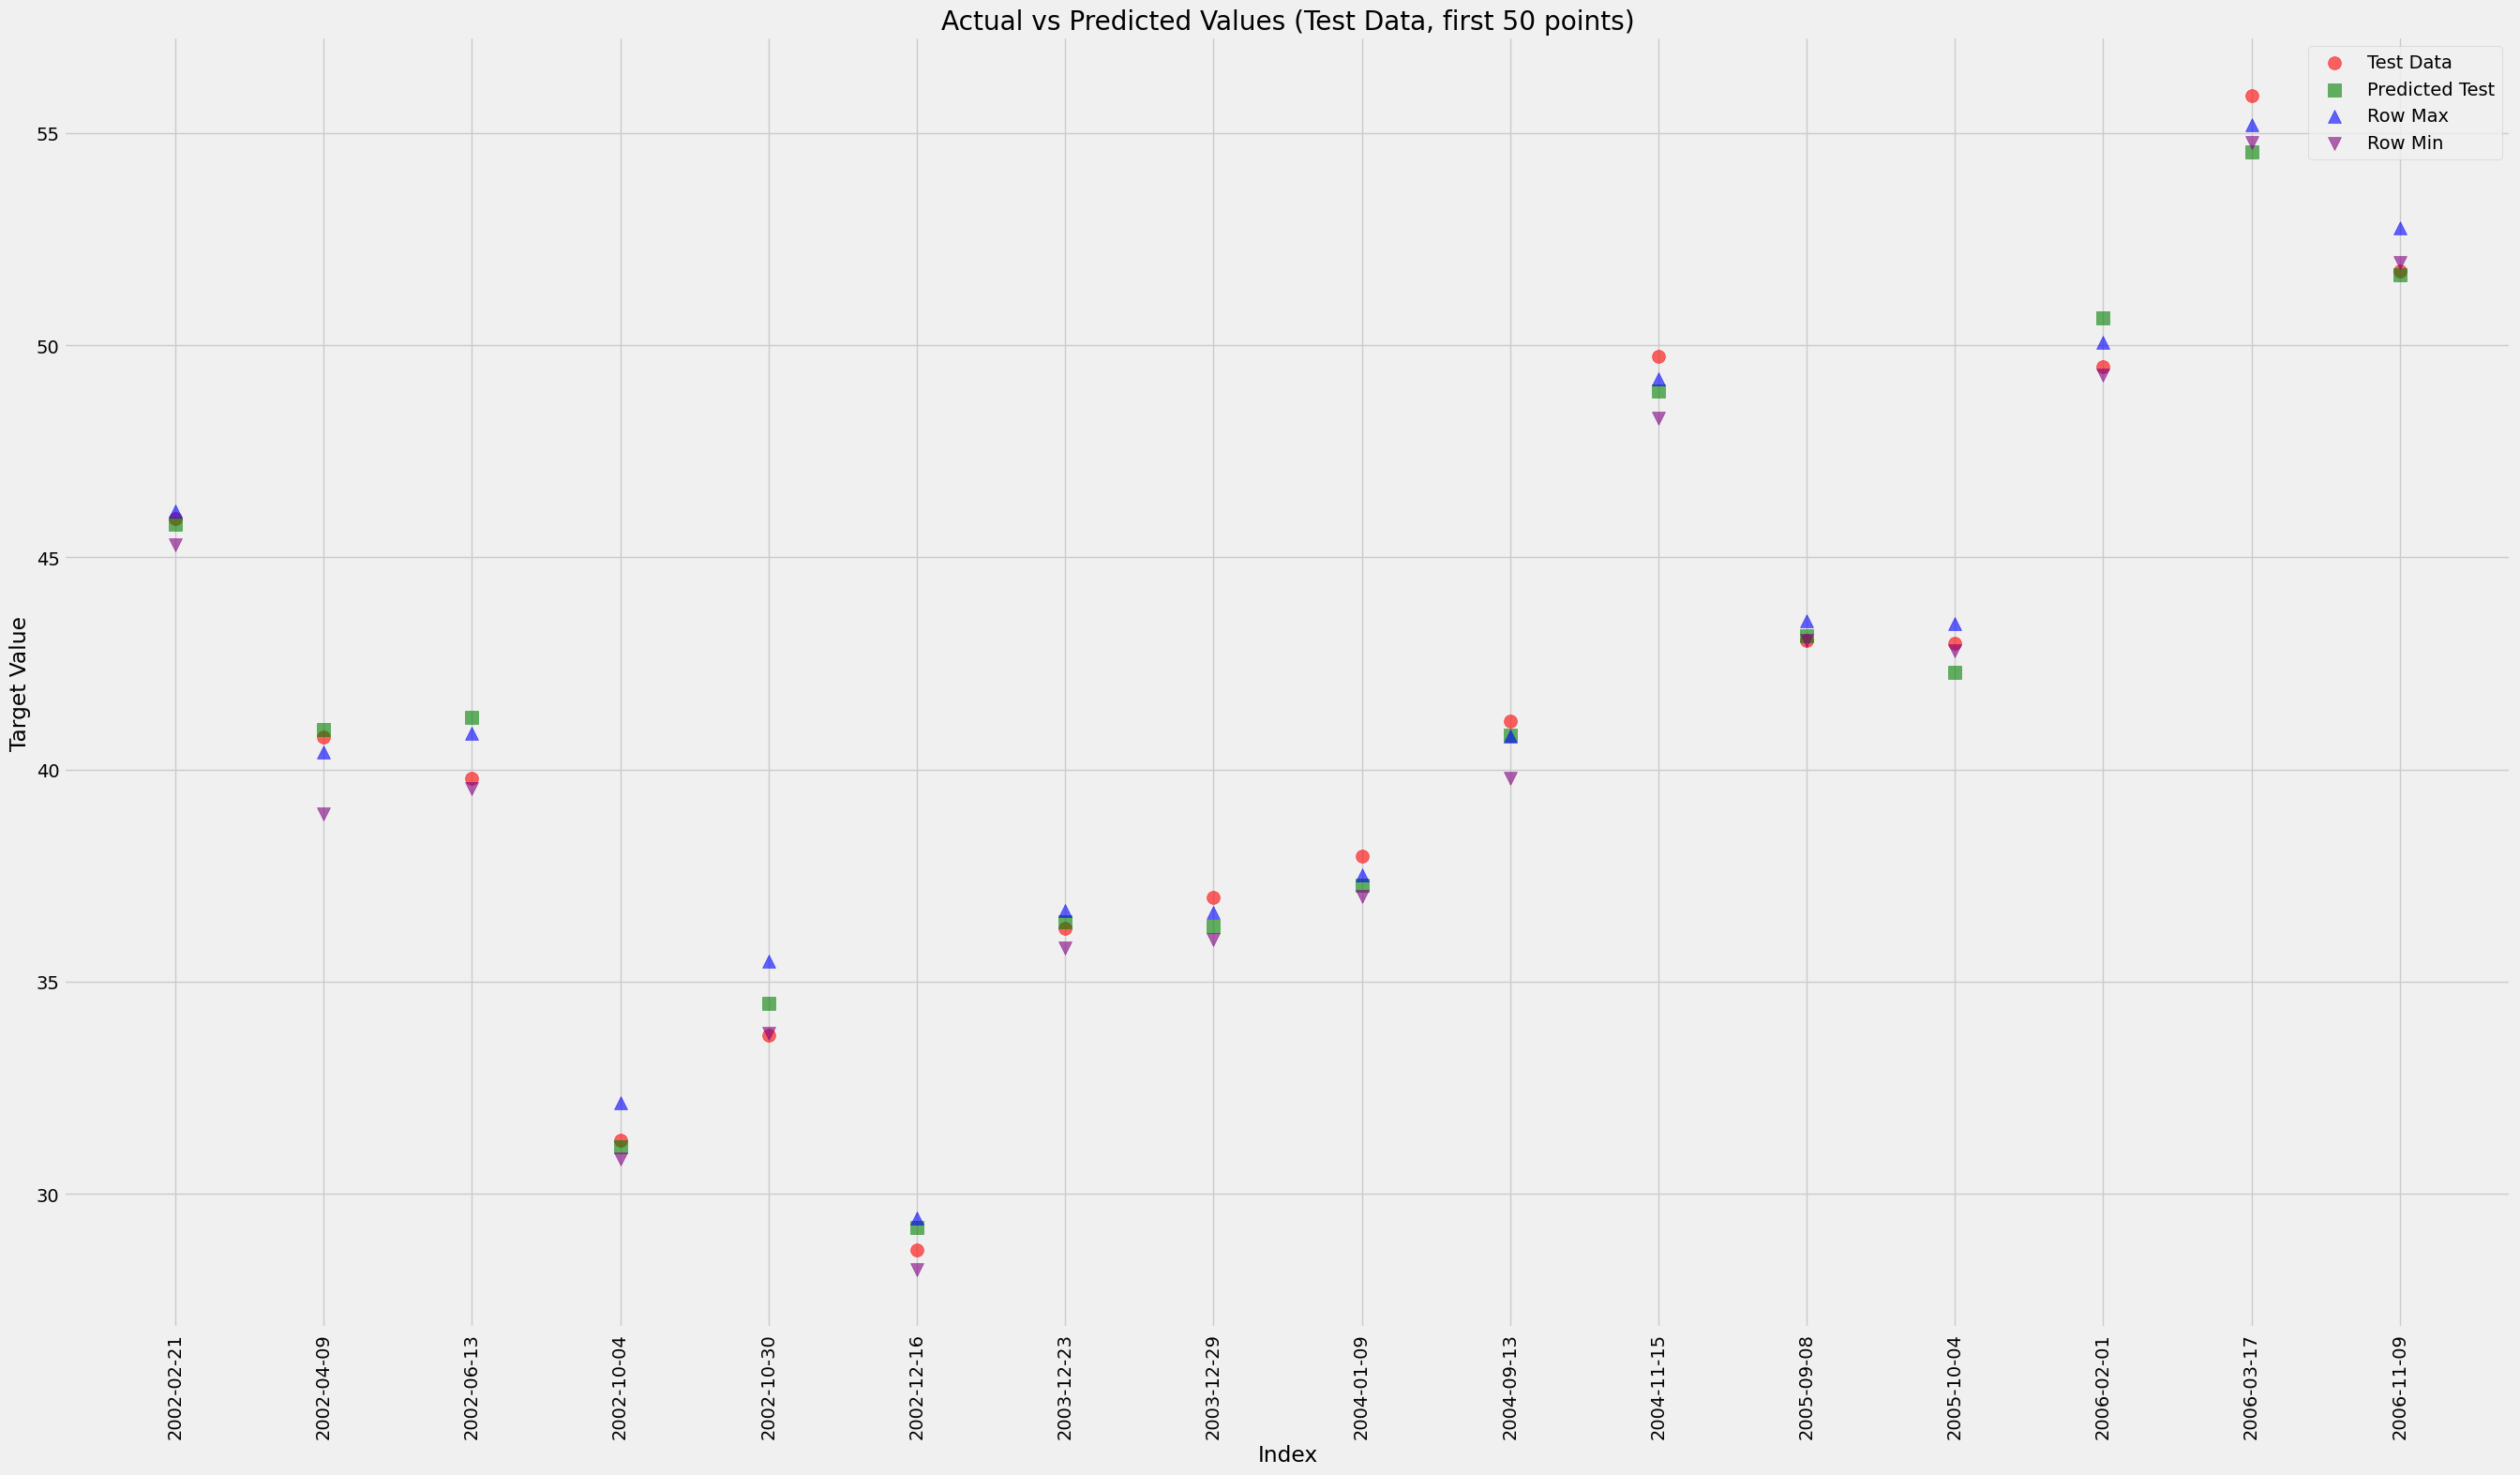

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[0:16], y_test_subset[0:16], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[0:16], y_test_pred_subset[0:16], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[0:16], row_max_subset[0:16], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[0:16], row_min_subset[0:16], color='purple', label='Row Min', alpha=0.6, marker='v', s=100)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


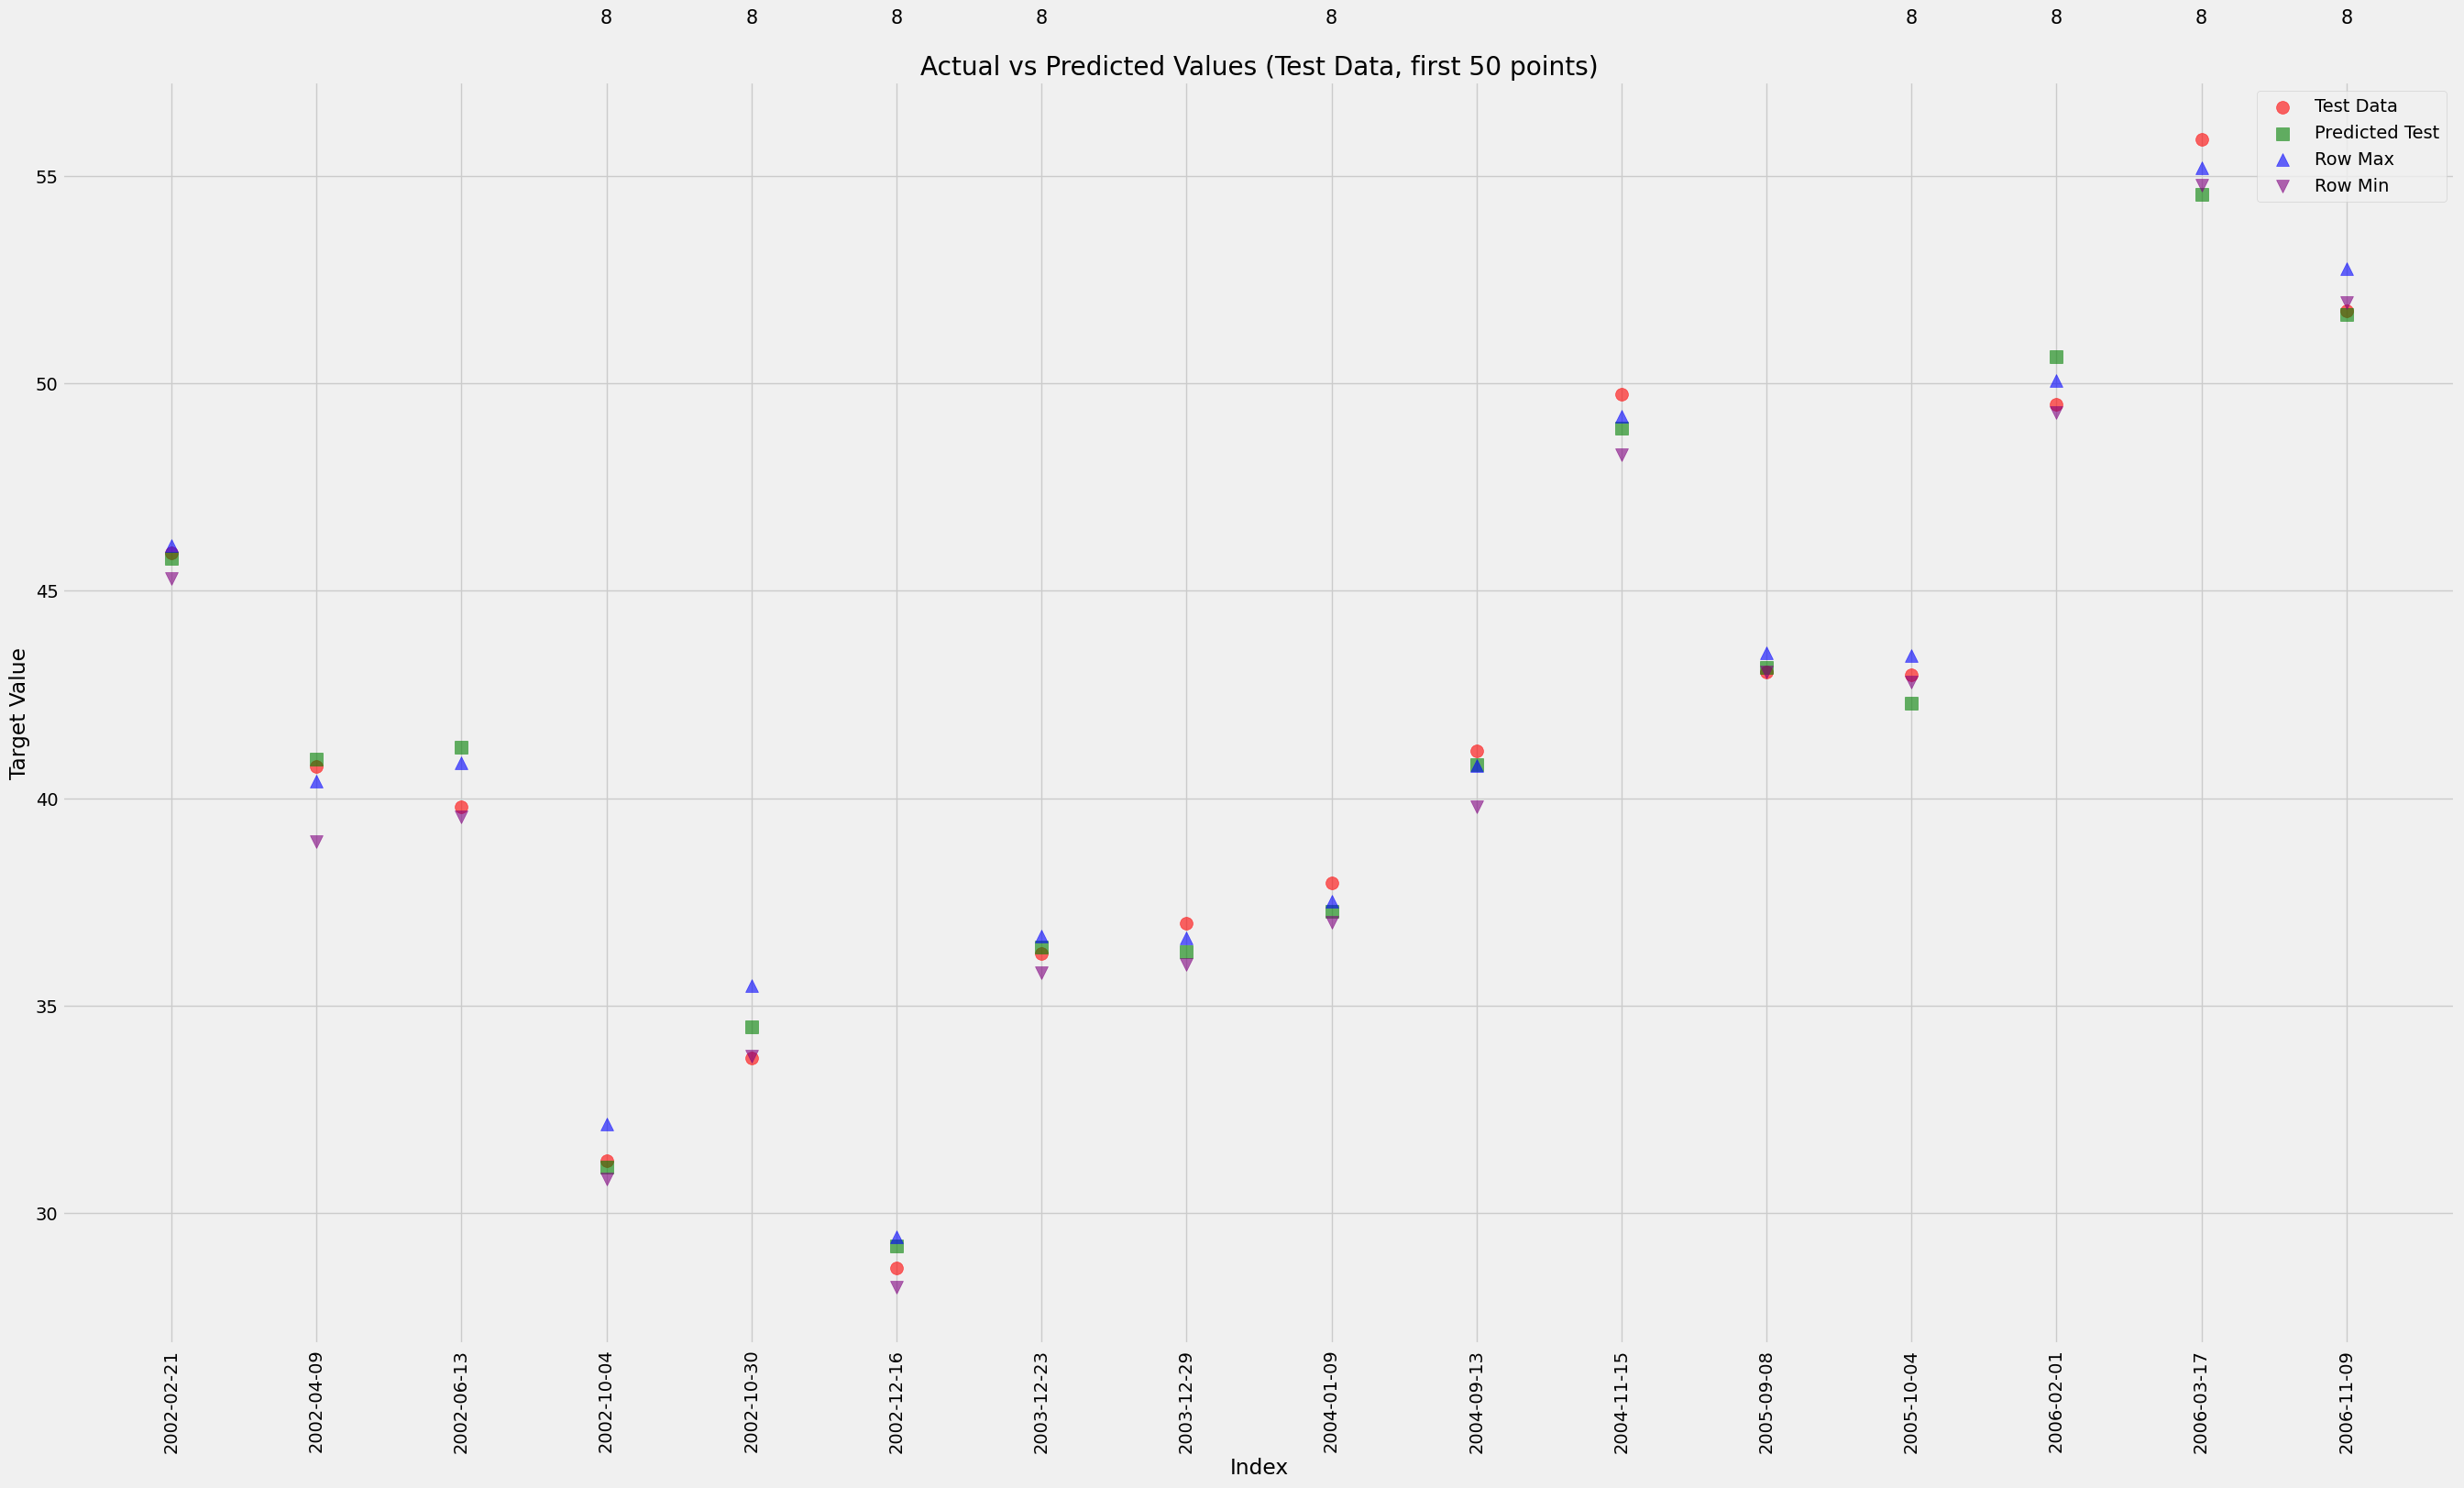

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test_pred, X_test, and y_test are defined elsewhere
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

plt.figure(figsize=(30, 17))

# Plotting existing data
plt.scatter(X_test_subset.index[0:16], y_test_subset[0:16], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[0:16], y_test_pred_subset[0:16], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[0:16], row_max_subset[0:16], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[0:16], row_min_subset[0:16], color='purple', label='Row Min', alpha=0.6, marker='v', s=100)

# Adding 'Pattern' text annotations
pattern_values = X_test_subset['Pattern'][0:16]  # Assuming 'Pattern' column exists
y_offset = max(max(y_test_subset[0:16]), max(row_max_subset[0:16])) * 1.05  # Calculate offset based on max y-value

for i, pattern in enumerate(pattern_values):
    plt.text(X_test_subset.index[i], y_offset, pattern, horizontalalignment='center', fontsize=15)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


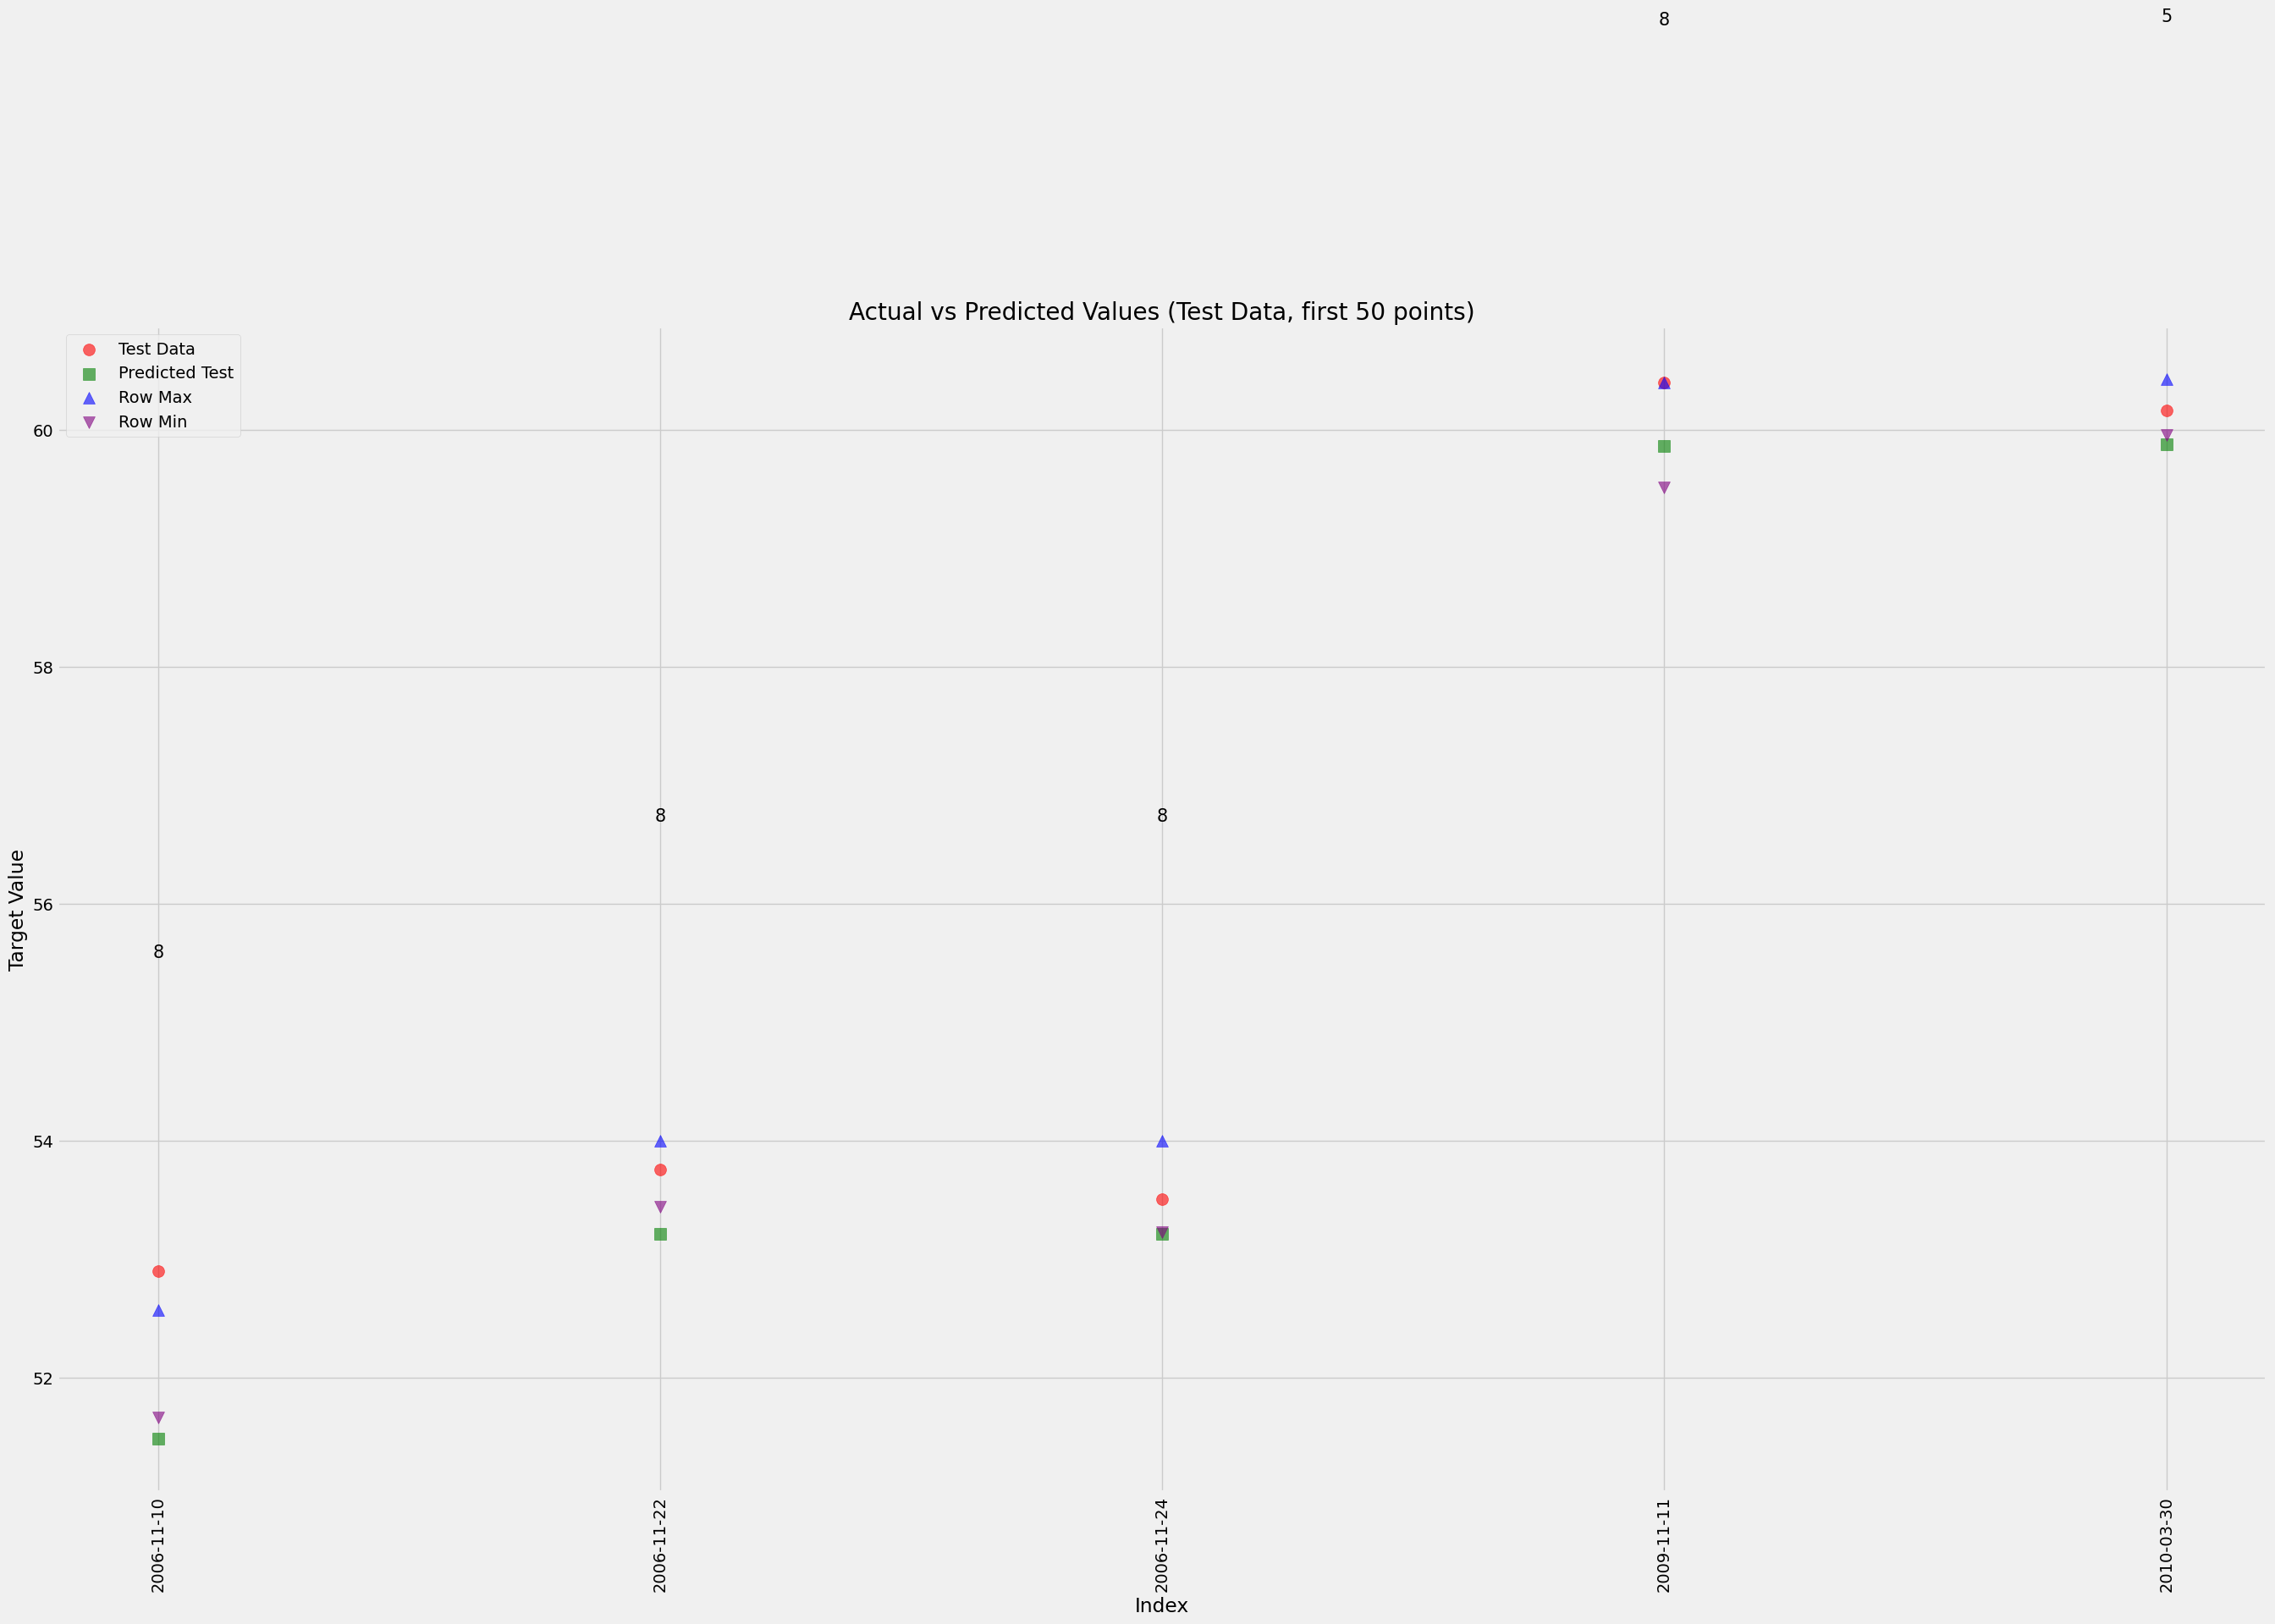

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test_pred, X_test, and y_test are defined elsewhere
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

plt.figure(figsize=(30, 17))

# Plotting existing data
plt.scatter(X_test_subset.index[16:21], y_test_subset[16:21], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[16:21], y_test_pred_subset[16:21], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[16:21], row_max_subset[16:21], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[16:21], row_min_subset[16:21], color='purple', label='Row Min', alpha=0.6, marker='v', s=100)

# Adding 'Pattern' text annotations
pattern_values = X_test_subset['Pattern'][16:21]  # Assuming 'Pattern' column exists

for idx in X_test_subset.index[16:21]:
    y_offset = max(y_test_subset[idx], row_max_subset[idx]) * 1.05  # Calculate offset based on max y-value for each index
    pattern = X_test_subset.loc[idx, 'Pattern']
    plt.text(idx, y_offset, pattern, horizontalalignment='center', fontsize=15)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Prepare DataFrames/Series for plotting
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Assuming Row_Max and Row_Min are columns in X_test
max_values = X_test_subset['Row_Max']
min_values = X_test_subset['Row_Min']

In [ ]:
paired_data_50 = pd.DataFrame({
    'Actual': y_test_subset,
    'Predicted': y_test_pred_subset,
    'Max': max_values,
    'Min': min_values,
    'Pattern': X_test_subset['Pattern']
})

paired_data_50

,Actual,Predicted,Max,Min,Pattern
Date,,,,,
2002-02-21,45.910000,45.789204,46.090000,45.299999,None
2002-04-09,40.759998,40.935074,40.419998,38.950001,None
2002-06-13,39.799999,41.229824,40.860001,39.549999,None
2002-10-04,31.270000,31.107012,32.160000,30.820000,8
2002-10-30,33.740002,34.495716,35.490002,33.790001,8
2002-12-16,28.680000,29.221054,29.440001,28.219999,8
2003-12-23,36.250000,36.410072,36.669998,35.790001,8
2003-12-29,36.980000,36.293934,36.630001,35.990002,None
2004-01-09,37.959999,37.282730,37.529999,37.020000,8


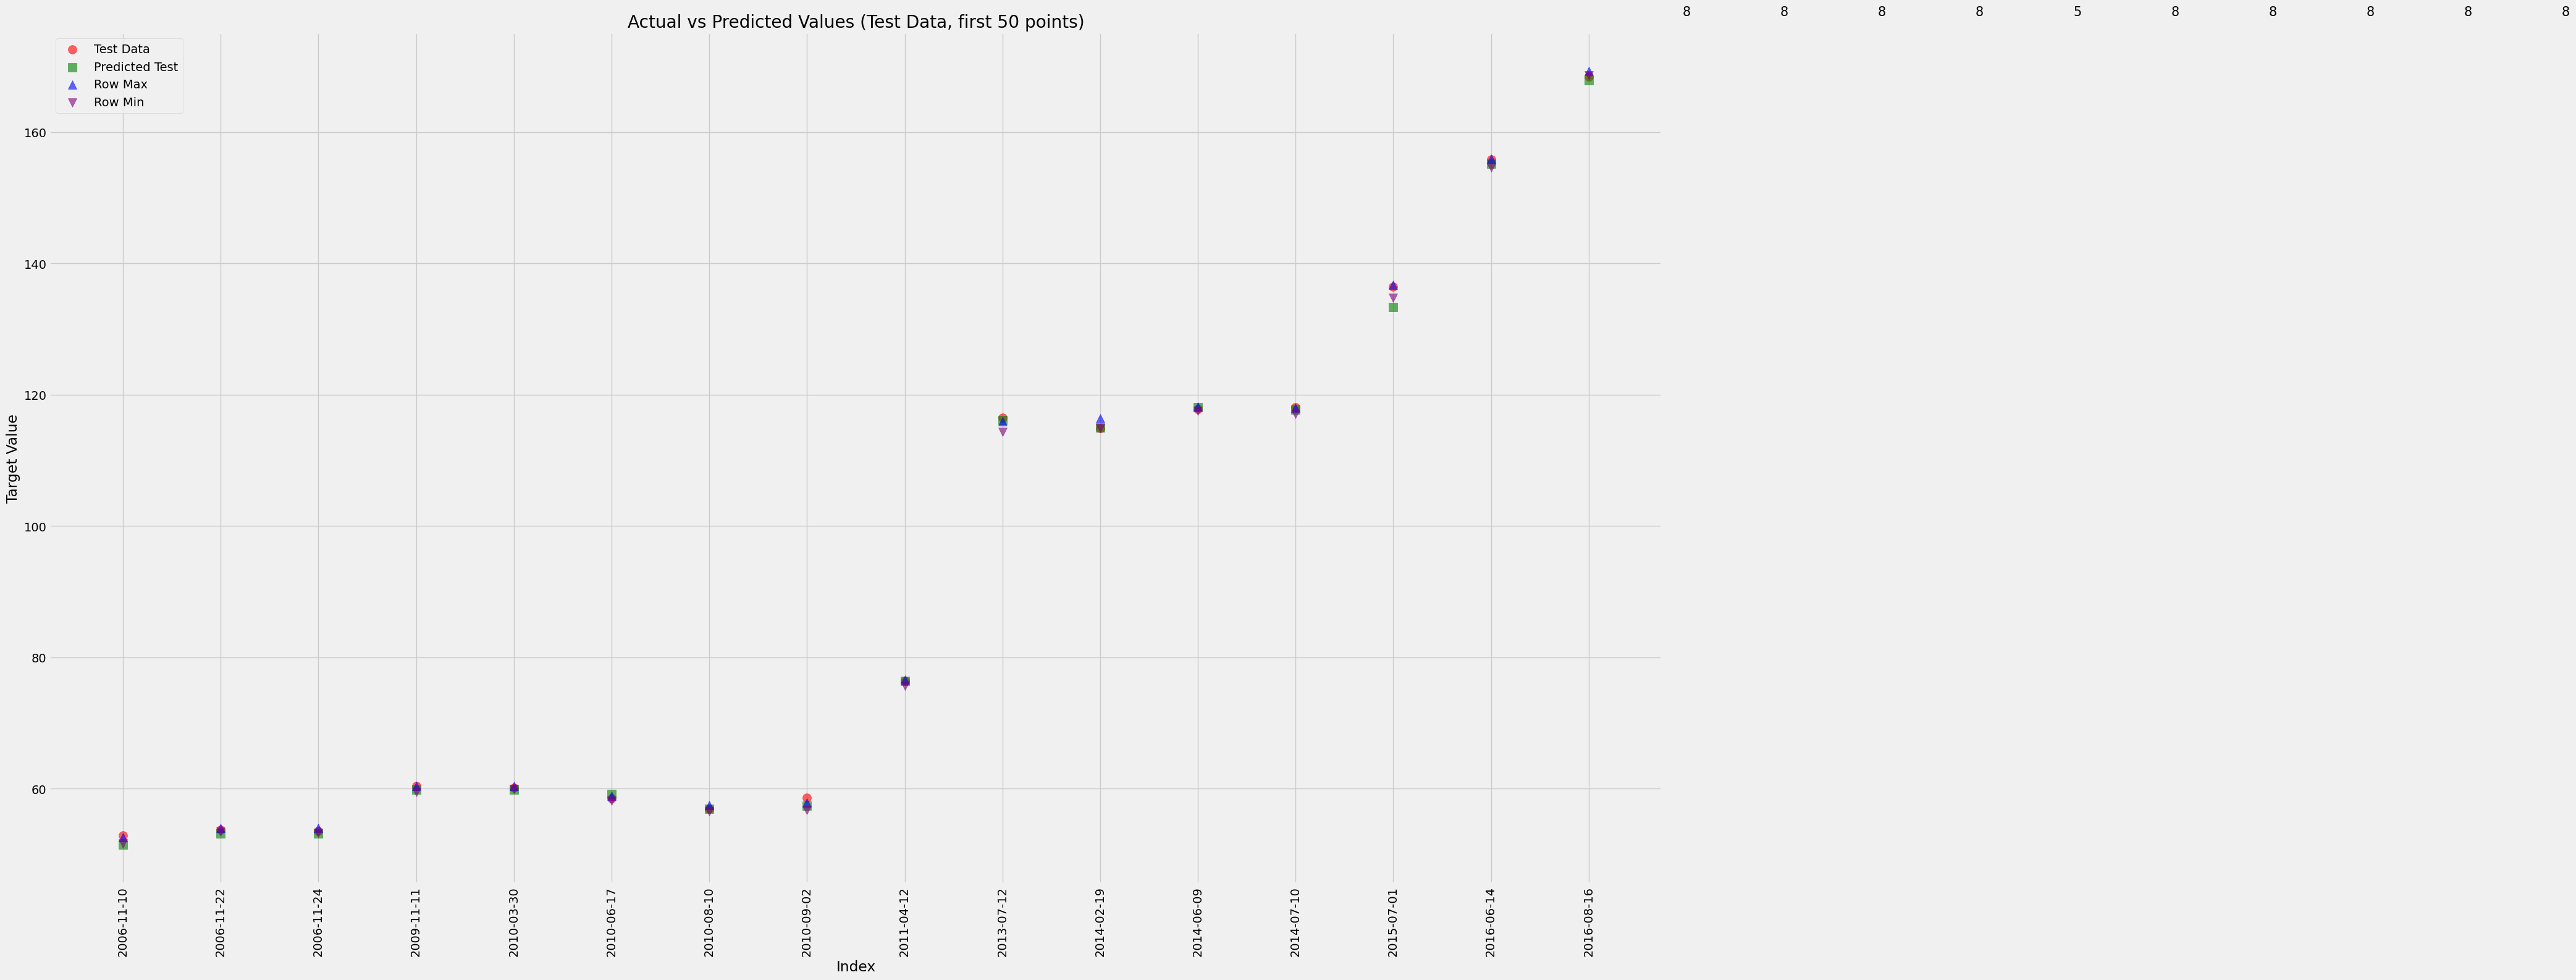

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test_pred, X_test, and y_test are defined elsewhere
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

plt.figure(figsize=(30, 17))

# Plotting existing data
plt.scatter(X_test_subset.index[16:32], y_test_subset[16:32], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[16:32], y_test_pred_subset[16:32], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[16:32], row_max_subset[16:32], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[16:32], row_min_subset[16:32], color='purple', label='Row Min', alpha=0.6, marker='v', s=100)

# Adding 'Pattern' text annotations
pattern_values = X_test_subset['Pattern'][16:32]  # Assuming 'Pattern' column exists
y_offset = max(max(y_test_subset[16:32]), max(row_max_subset[16:32])) * 1.05  # Calculate offset based on max y-value

for i, pattern in enumerate(pattern_values):
    plt.text(X_test_subset.index[i], y_offset, pattern, horizontalalignment='center', fontsize=15)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
paired_data_50

,Actual,Predicted,Max,Min,Pattern
Date,,,,,
2002-02-21,45.910000,45.578880,46.090000,45.299999,None
2002-04-09,40.759998,40.723999,40.419998,38.950001,None
2002-06-13,39.799999,40.947800,40.860001,39.549999,None
2002-10-04,31.270000,31.086487,32.160000,30.820000,8
2002-10-30,33.740002,34.621479,35.490002,33.790001,8
2002-12-16,28.680000,29.200848,29.440001,28.219999,8
2003-12-23,36.250000,36.426914,36.669998,35.790001,8
2003-12-29,36.980000,36.303757,36.630001,35.990002,None
2004-01-09,37.959999,37.314259,37.529999,37.020000,8


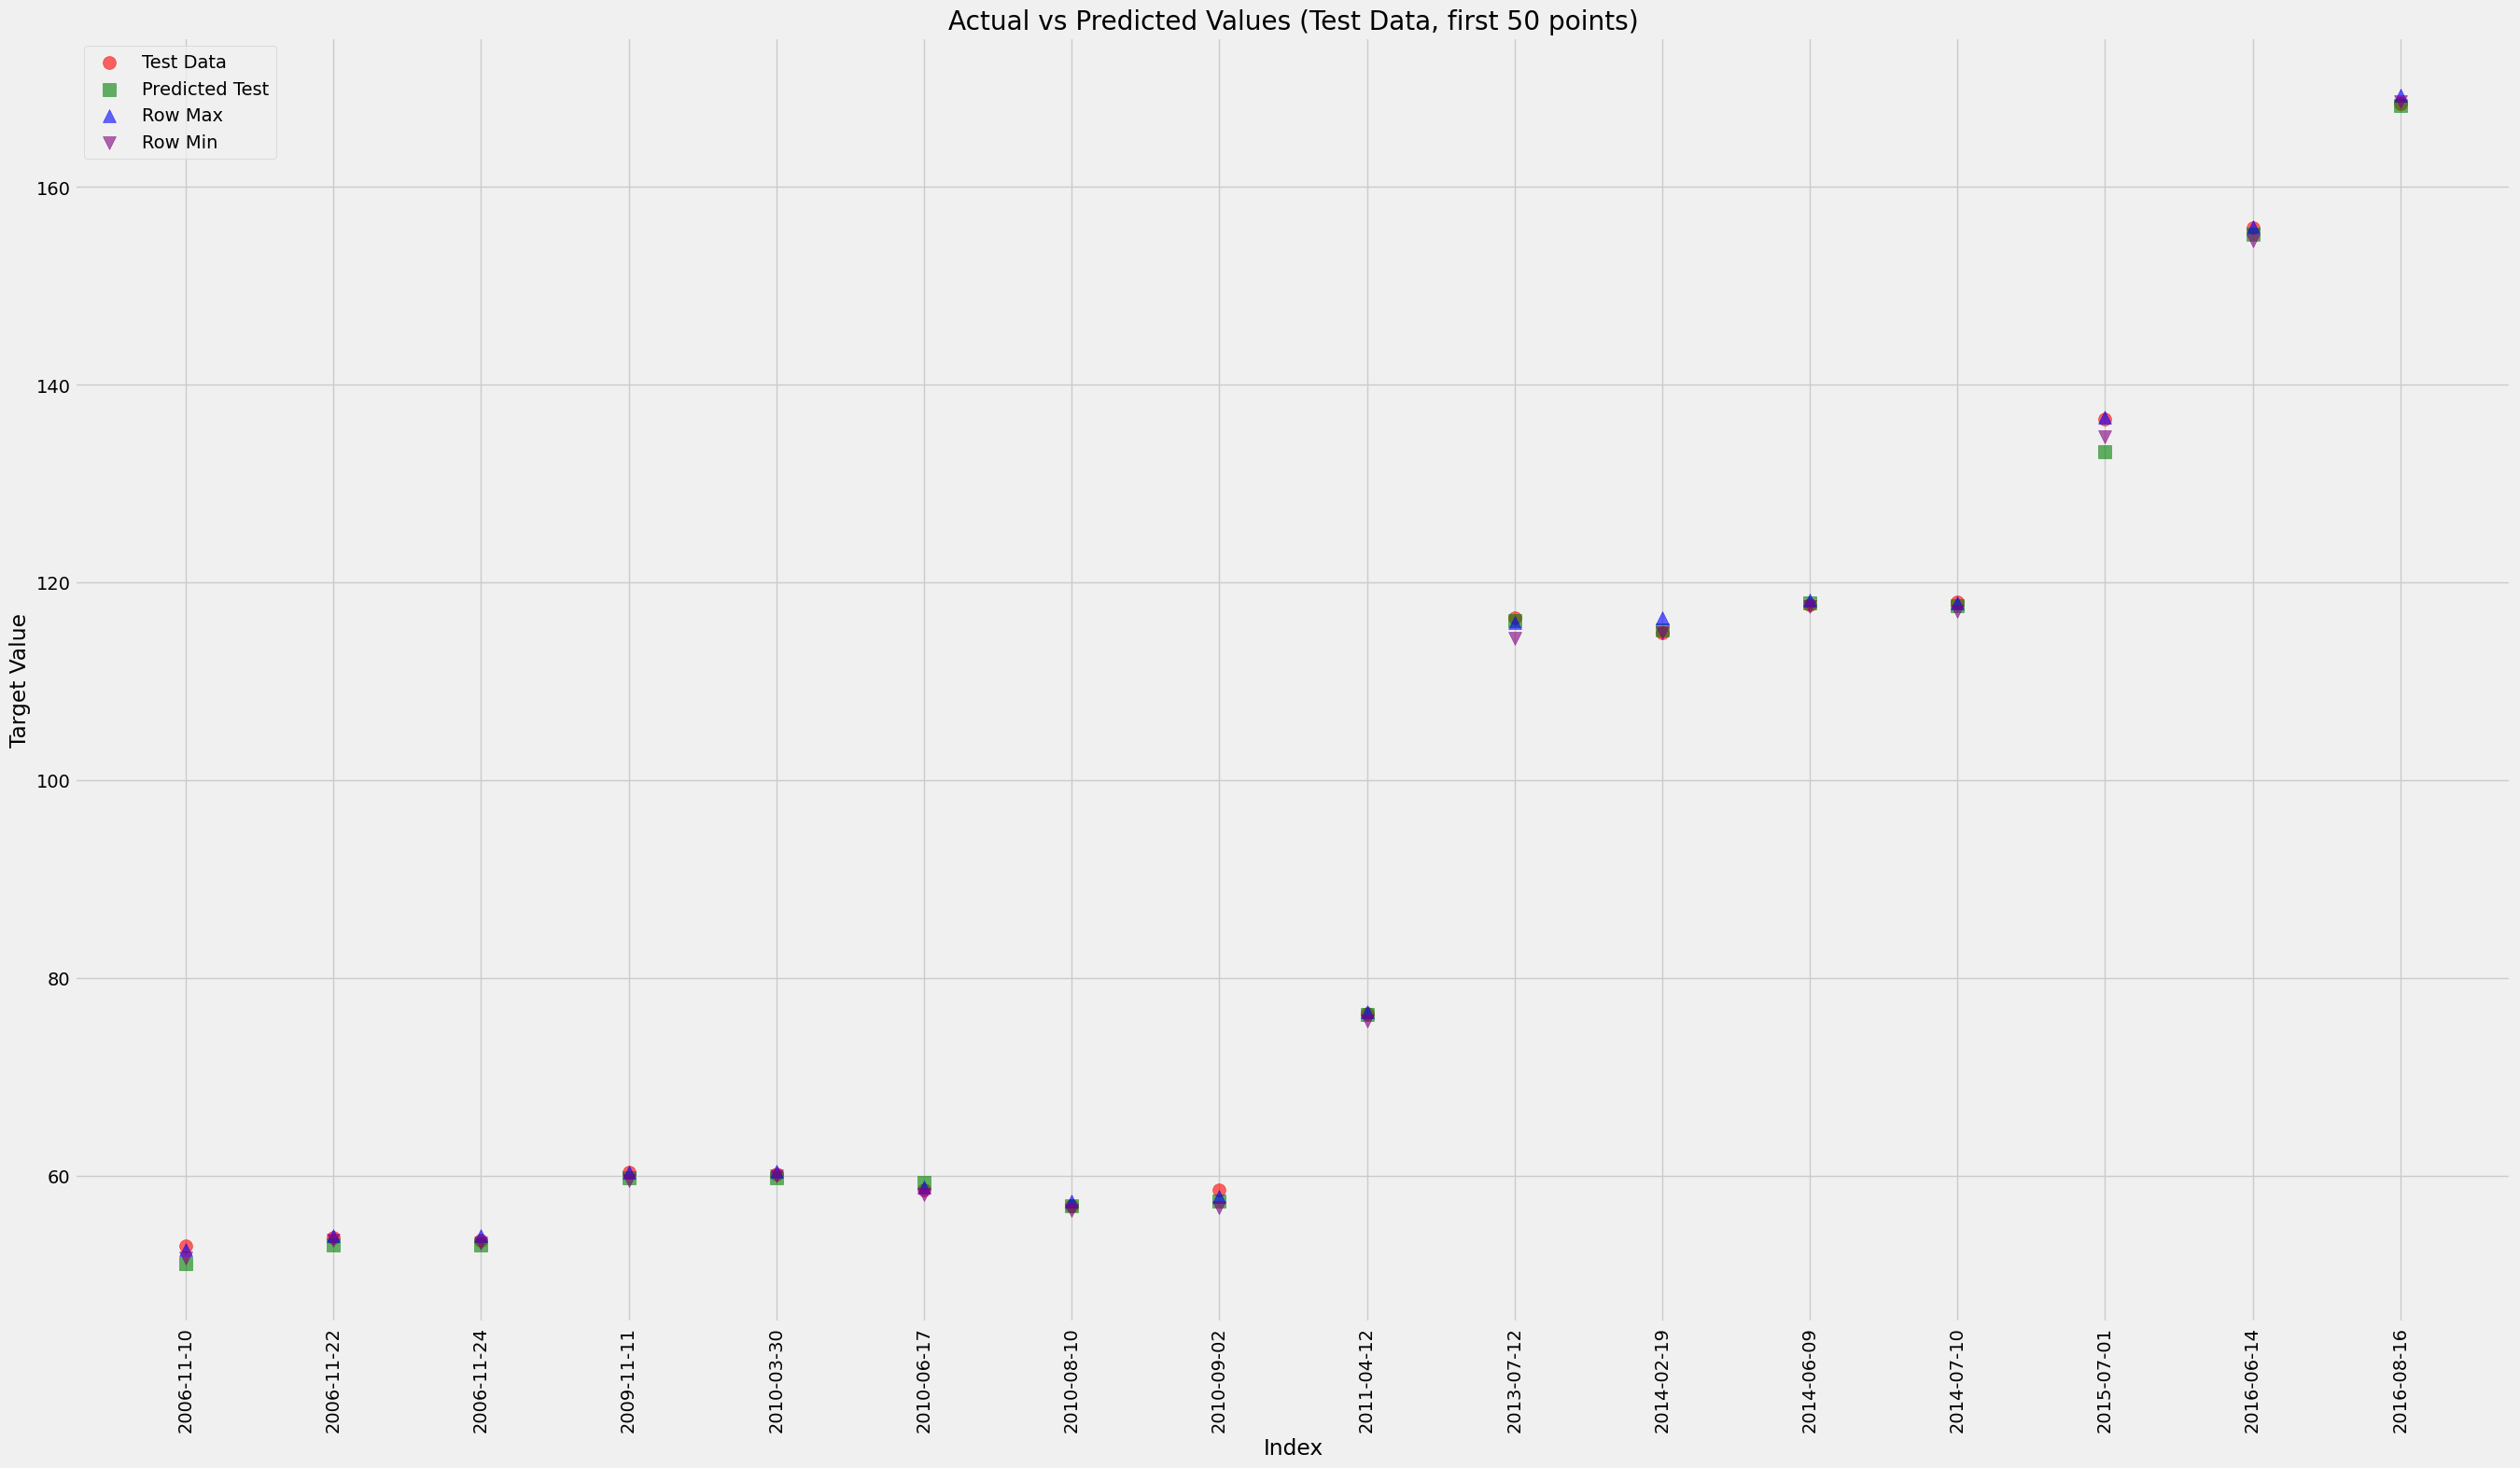

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[16:32], y_test_subset[16:32], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[16:32], y_test_pred_subset[16:32], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[16:32], row_max_subset[16:32], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[16:32], row_min_subset[16:32], color='purple', label='Row Min', alpha=0.6, marker='v', s=100)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


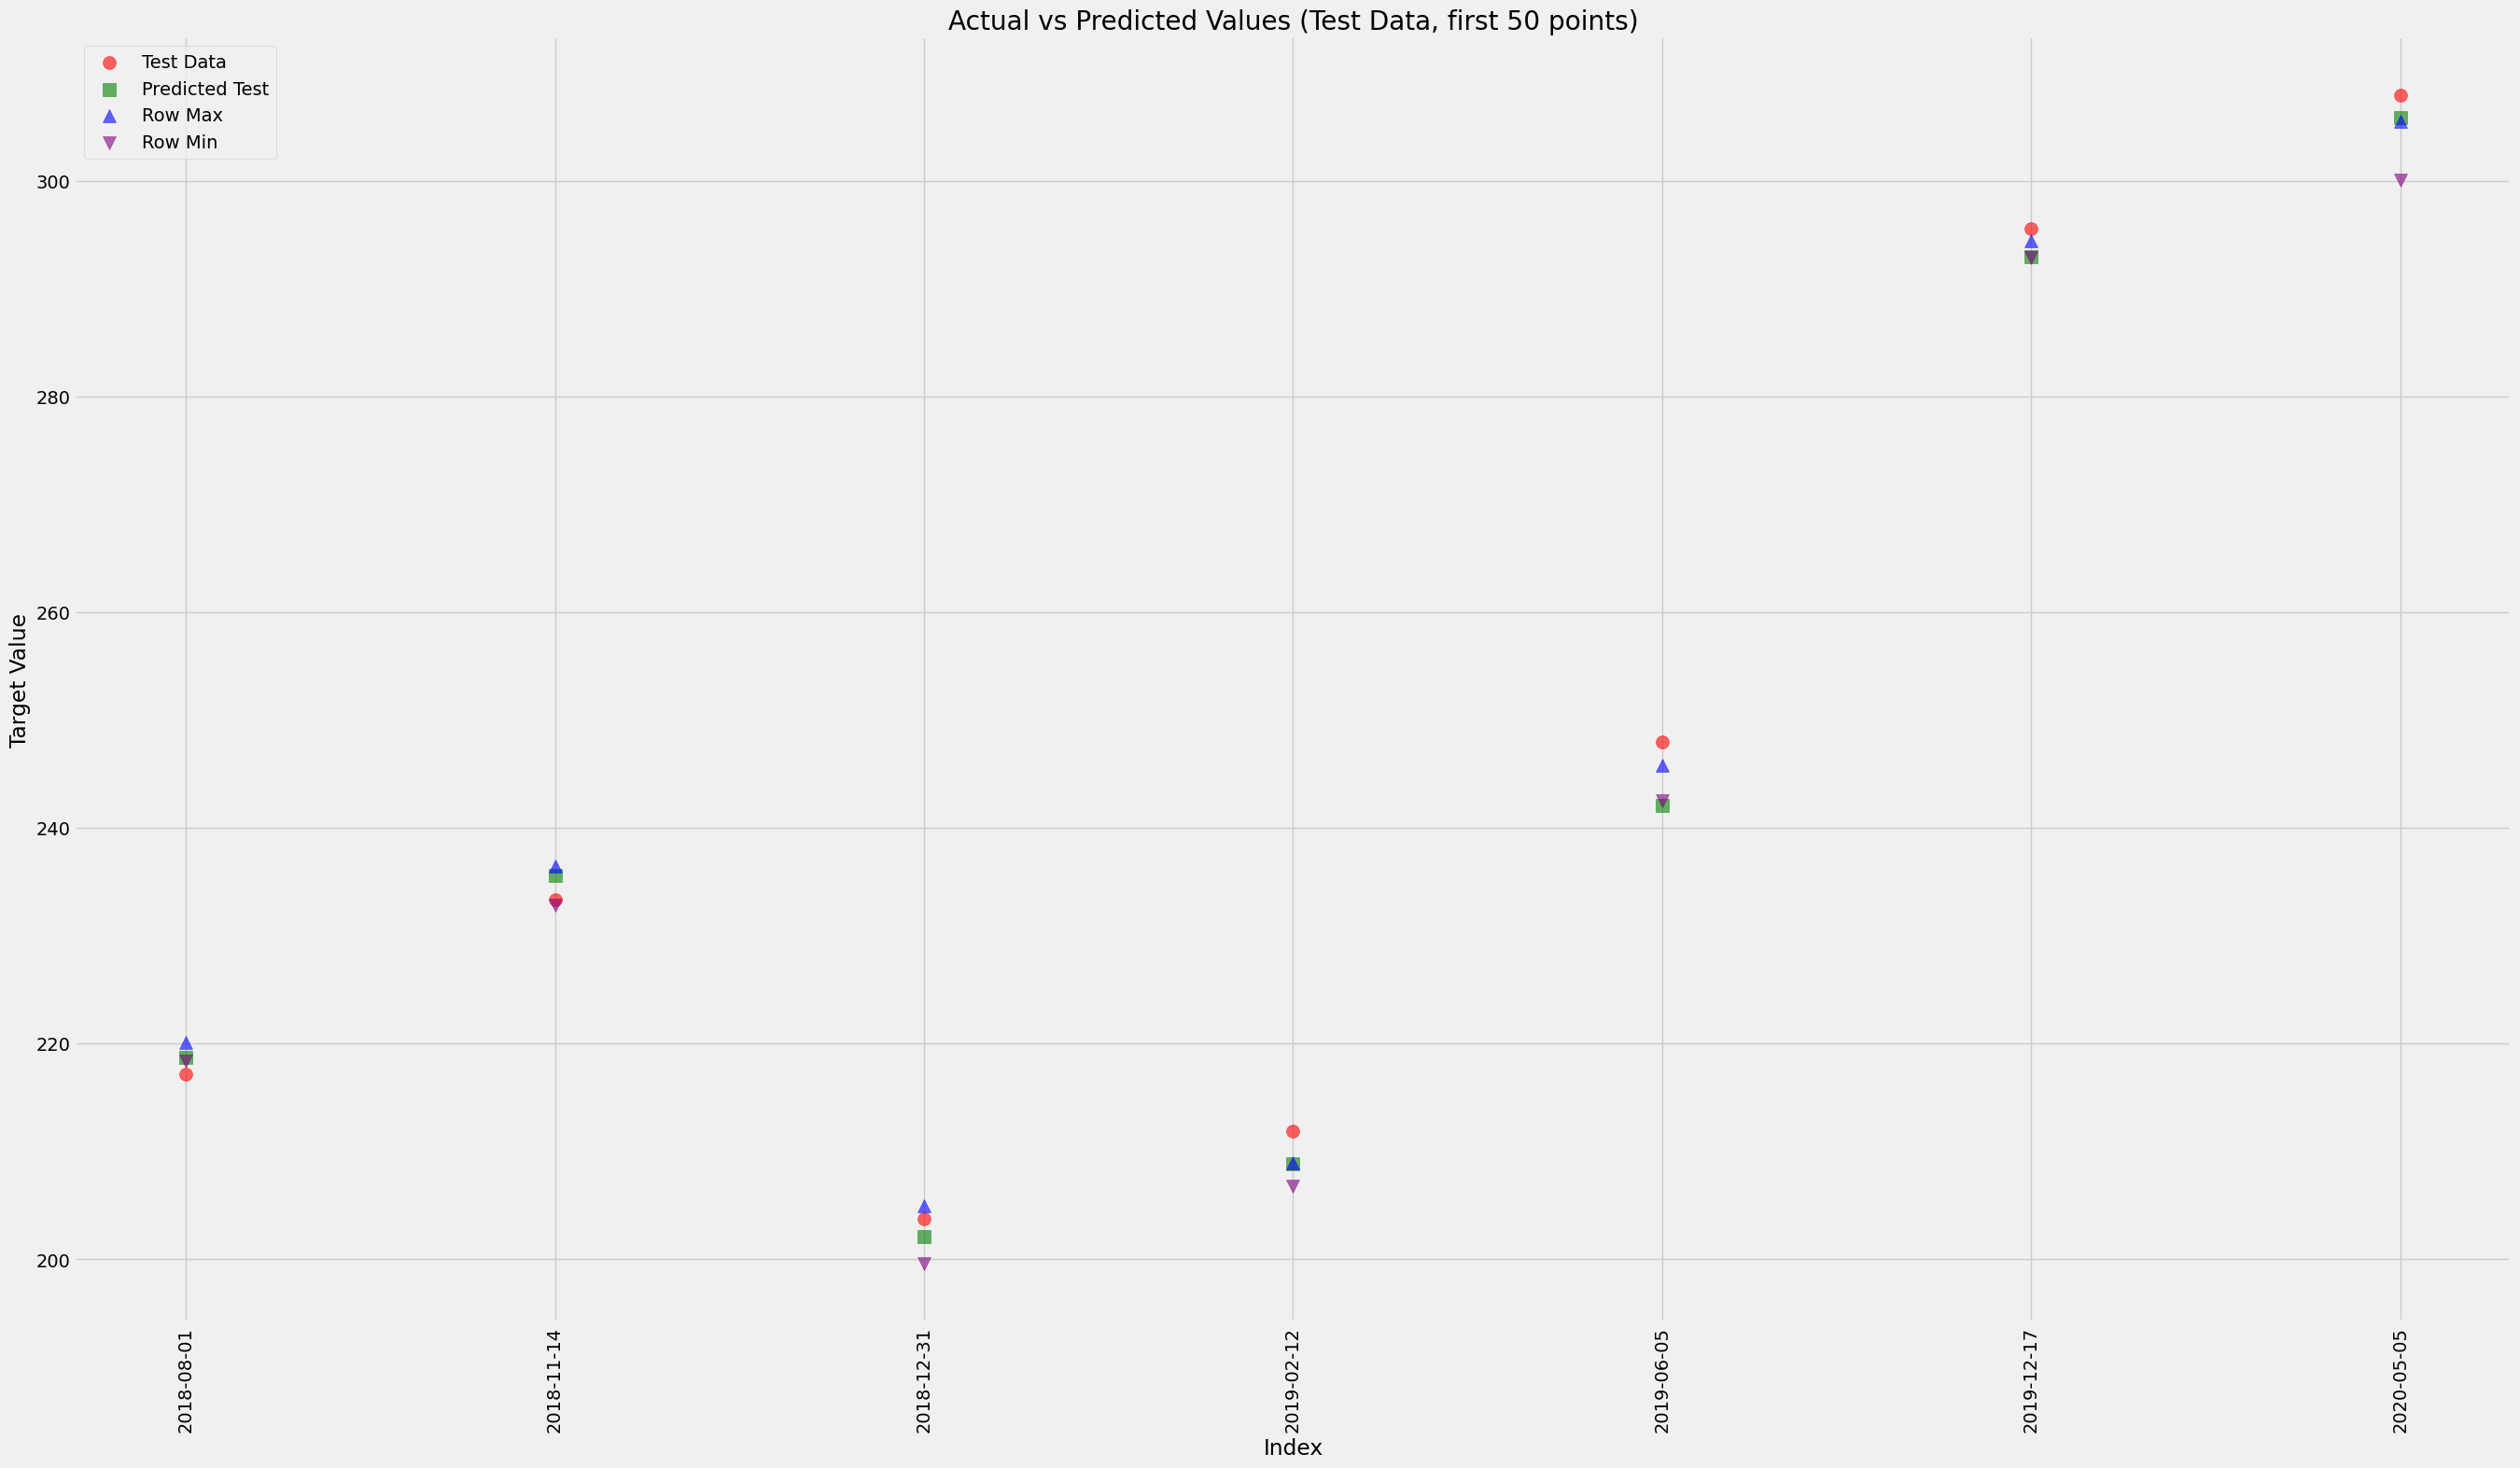

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[33:40], y_test_subset[33:40], color='red', label='Test Data', alpha=0.6, marker='o', s=100)
plt.scatter(X_test_subset.index[33:40], y_test_pred_subset[33:40], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)
plt.scatter(X_test_subset.index[33:40], row_max_subset[33:40], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[33:40], row_min_subset[33:40], color='purple', label='Row Min', alpha=0.6, marker='v', s=100)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

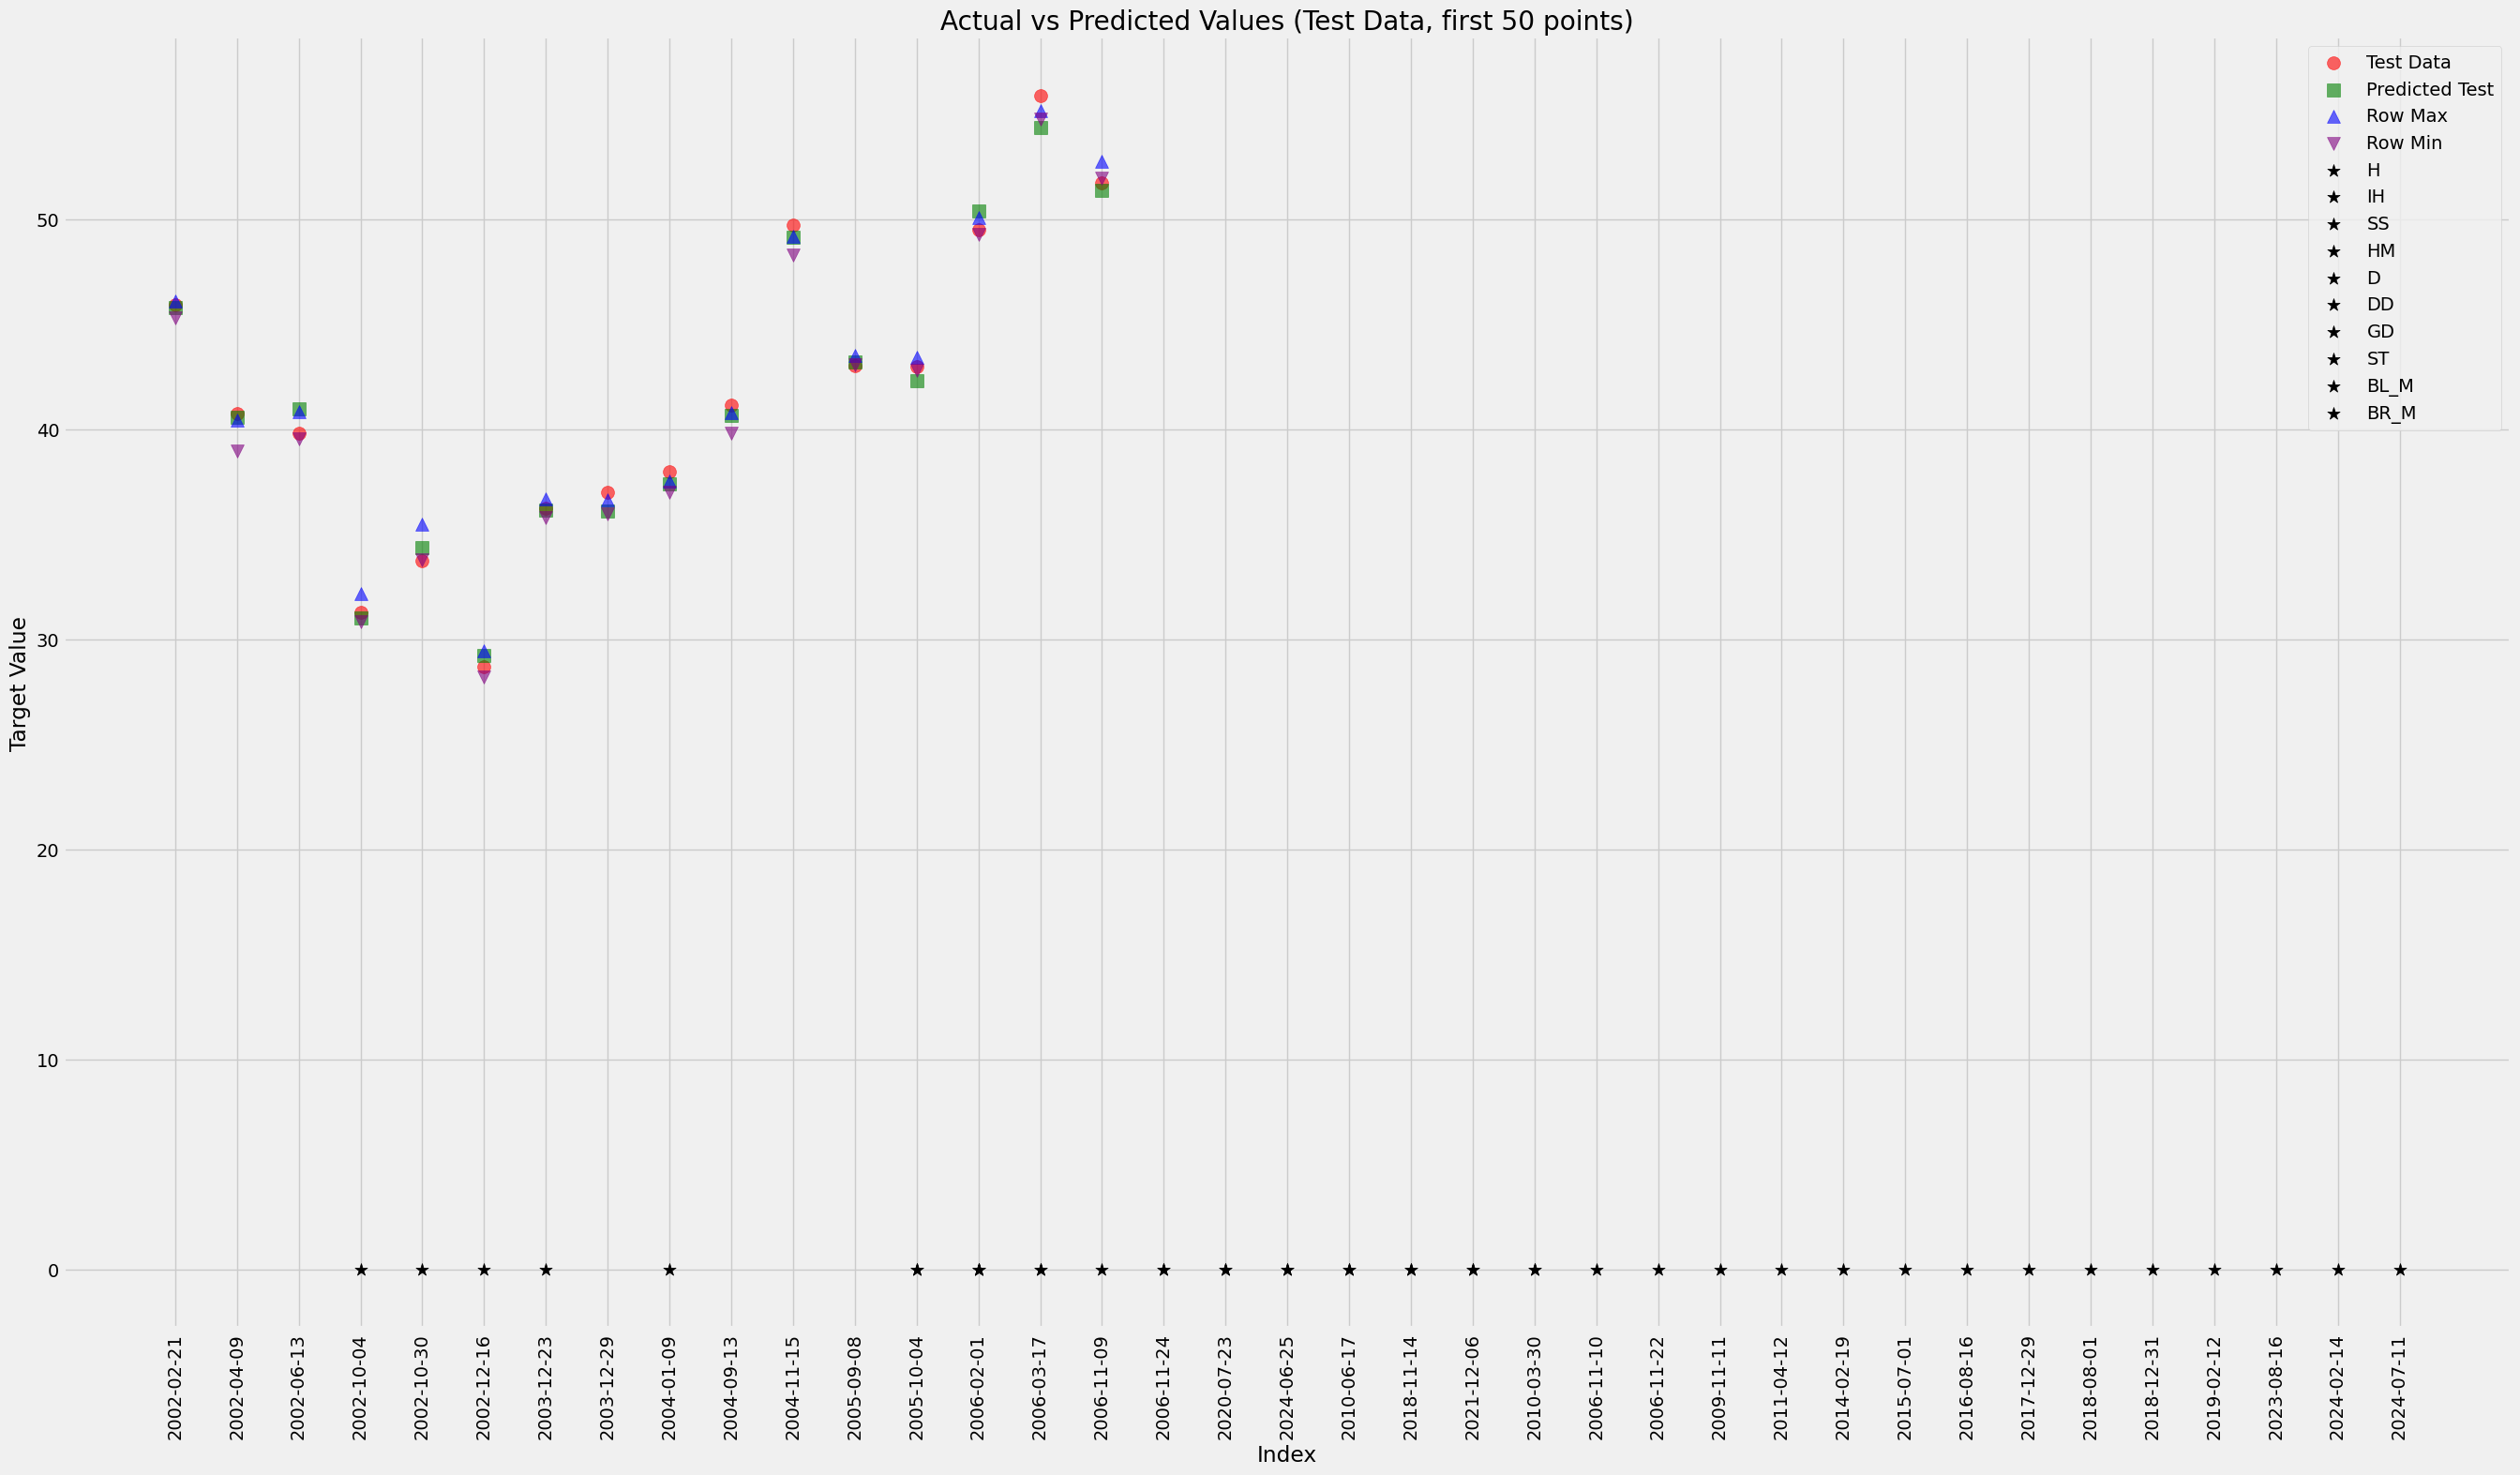

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test_pred, X_test, and y_test are already defined
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Columns to check for value '1'
columns_to_check = ['H', 'IH', 'SS', 'HM', 'D', 'DD', 'GD', 'ST', 'BL_M', 'BR_M']

# Initialize figure
plt.figure(figsize=(30, 17))

# Scatter plot for actual test data
plt.scatter(X_test_subset.index[0:16], y_test_subset[0:16], color='red', label='Test Data', alpha=0.6, marker='o', s=100)

# Scatter plot for predicted test data
plt.scatter(X_test_subset.index[0:16], y_test_pred_subset[0:16], color='green', label='Predicted Test', alpha=0.6, marker='s', s=100)

# Scatter plot for row max and min
plt.scatter(X_test_subset.index[0:16], row_max_subset[0:16], color='blue', label='Row Max', alpha=0.6, marker='^', s=100)
plt.scatter(X_test_subset.index[0:16], row_min_subset[0:16], color='purple', label='Row Min', alpha=0.6, marker='v', s=100)

# Dynamically plot columns with value '1'
for col in columns_to_check:
    if col in X_test_subset.columns:
        ones_indices = X_test_subset[X_test_subset[col] == 1].index
        plt.scatter(ones_indices, [0]*len(ones_indices), color='black', label=col, marker='*', s=100)

plt.title('Actual vs Predicted Values (Test Data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


